In [1]:
import tweepy
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import emoji
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('CustomerReviews.csv')

In [3]:
momo = df.loc[df.Restaurant_ID.isin(['352696Px-mo-mo-paradise-เดอะมอลล์-บางกะปิ'])]
shabushi = df.loc[df.Restaurant_ID.isin(['4621tm-shabushi-เดอะมอลล์บางกะปิ-ชั้น-g'])]
chabu = df.loc[df.Restaurant_ID.isin(['436045MJ-ข้าน้อยขอชาบู'])]

# คนพูดถึง Momoว่าอะไรนะ

In [4]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in momo["Headline"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df1 = pd.DataFrame(columns = ['word', 'count'])
keyword_df1['word'] = vectorizer.get_feature_names()
keyword_df1['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df1.sort_values(by=['count'], ascending=False).head(10)

,word,count
17,บริการ,4
10,ดี,3
7,ชาบู,3
11,ดี,3
12,ดีมาก,2
21,รสชาติ,2
31,อาหาร,2
33,เนื้อ,2
25,สาขา,2
23,ร้าน,2


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


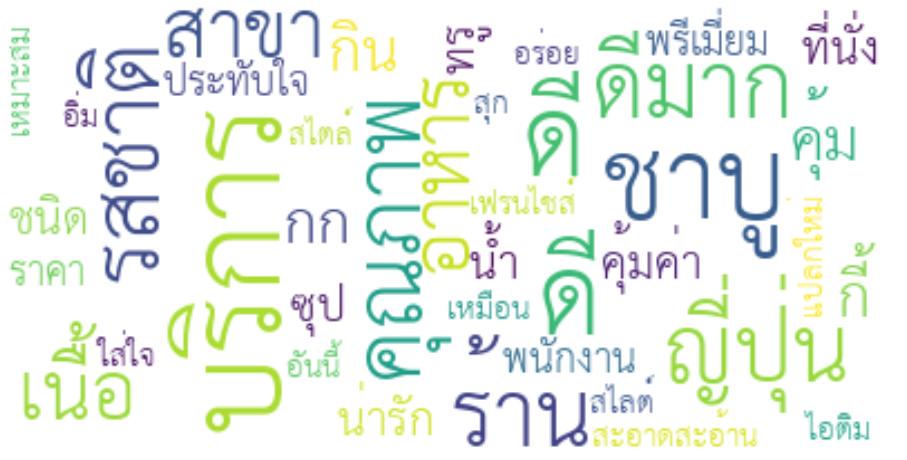

In [5]:
word_dict = {}
for i in range(0,len(keyword_df1)):
  word_dict[keyword_df1.word[i]]= keyword_df1['count'][i]
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [6]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in momo["Review"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

,word,count
81,น้ำ,15
122,ร้าน,13
183,เนื้อ,12
37,ชาบู,12
163,อร่อย,9
197,เลือก,9
115,รสชาติ,9
44,ซุป,8
9,กิน,8
36,ชอบ,7


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


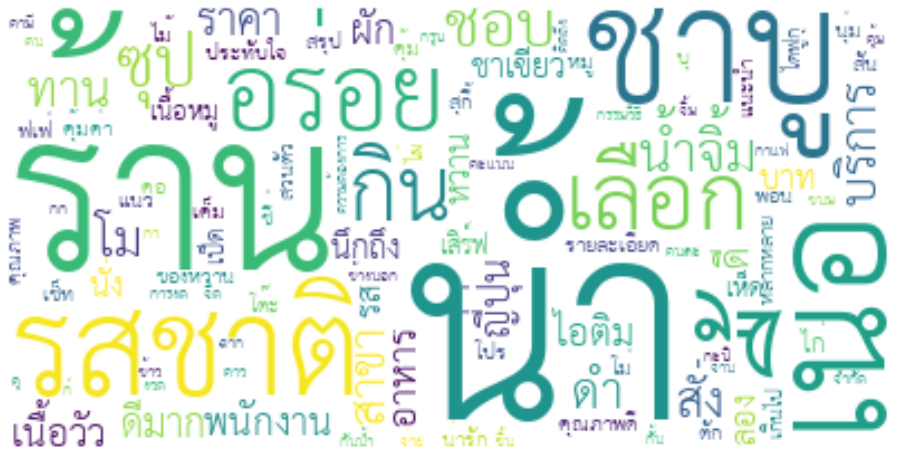

In [7]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# คนพูดถึง shabushiว่าอะไรนะ

In [8]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in shabushi["Headline"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df1 = pd.DataFrame(columns = ['word', 'count'])
keyword_df1['word'] = vectorizer.get_feature_names()
keyword_df1['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df1.sort_values(by=['count'], ascending=False).head(10)

,word,count
0,กุ้ง,3
3,คุ้ม,2
6,ชาบู,2
21,อร่อย,2
9,ทาน,2
15,ฝุดฝุด,1
25,เท,1
24,เต็มคราบ,1
23,เดือด,1
22,อิ่ม,1


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


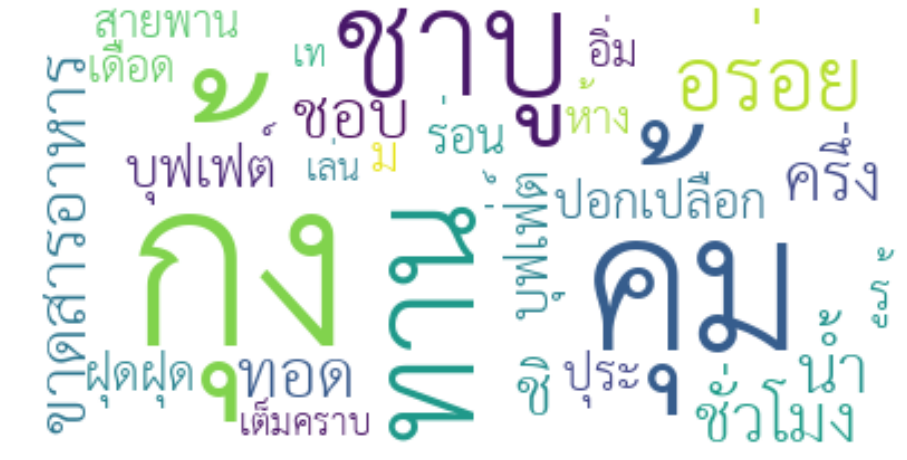

In [9]:
word_dict = {}
for i in range(0,len(keyword_df1)):
  word_dict[keyword_df1.word[i]]= keyword_df1['count'][i]
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [10]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in shabushi["Review"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

,word,count
160,ร้าน,14
89,ทาน,14
10,กุ้ง,13
7,กิน,12
25,คน,11
220,อาหาร,9
177,สด,9
50,ชิ,8
62,ดี,8
241,เท,7


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


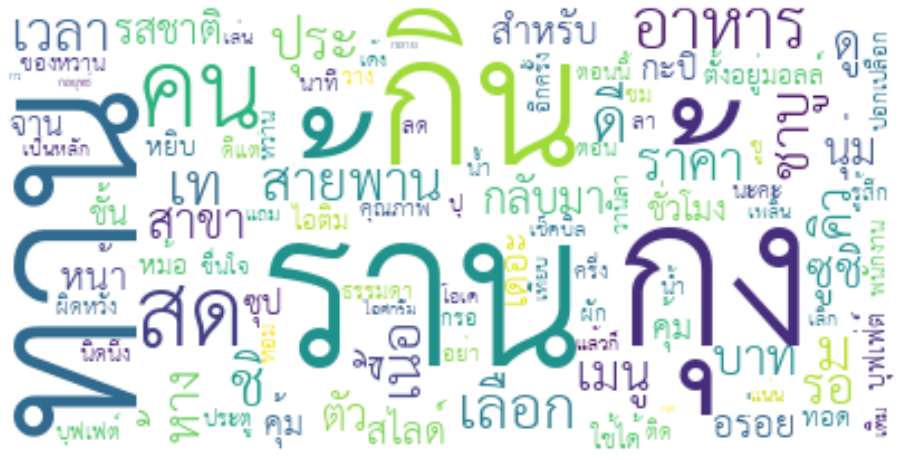

In [11]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

# คนพูดถึง ข้านอยขอ ว่าอะไรนะ

In [12]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in chabu["Headline"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df1 = pd.DataFrame(columns = ['word', 'count'])
keyword_df1['word'] = vectorizer.get_feature_names()
keyword_df1['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df1.sort_values(by=['count'], ascending=False).head(10)

,word,count
23,ราคา,4
17,บุฟเฟ่ต์,2
12,น้ำ,2
0,คนละ,1
29,อยู่ในเกณฑ์,1
24,ร้าน,1
25,สมราคา,1
26,สั่ง,1
27,หมู,1
28,หลากหลาย,1


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


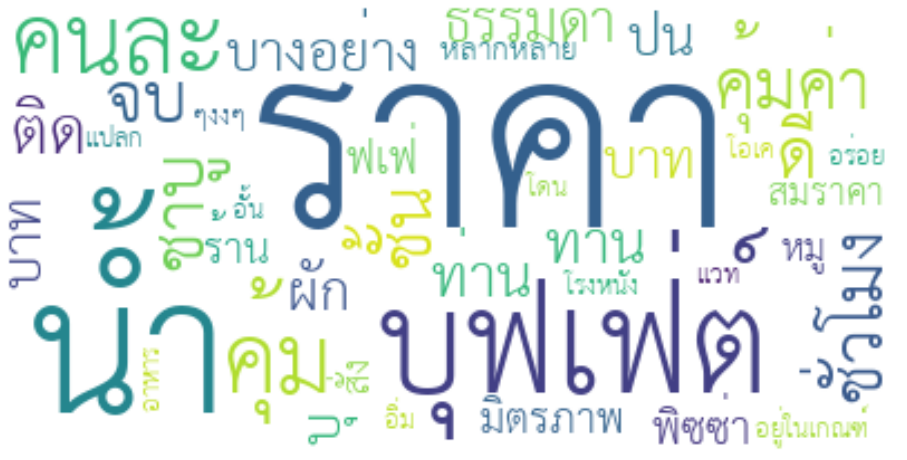

In [13]:
word_dict = {}
for i in range(0,len(keyword_df1)):
  word_dict[keyword_df1.word[i]]= keyword_df1['count'][i]
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()

In [14]:
def cleanText(text):
    text = str(text)
    text = re.sub('[^ก-๙]','',text)
    stop_word = list(thai_stopwords())
    sentence = word_tokenize(text)
    result = [word for word in sentence if word not in stop_word and " " not in word]
    return " /".join(result)

def tokenize(d):  
    result = d.split("/")
    result = list(filter(None, result))
    return result

new_text = []
for txt in chabu["Review"]:
    new_text.append(cleanText(txt))


vectorizer = CountVectorizer(tokenizer=tokenize)
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))   
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

,word,count
122,อร่อย,8
61,น้ำ,8
66,บาท,7
89,ราคา,7
31,ซุป,6
94,ร้าน,5
50,ทาน,5
7,ของหวาน,5
76,พิซซ่า,5
33,ดี,5


C:\Users\ASUS\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


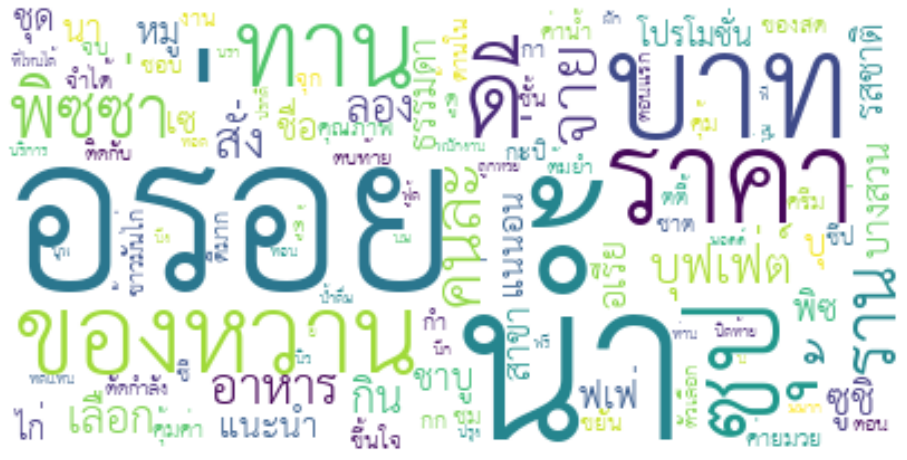

In [15]:
word_dict = {}
for i in range(0,len(keyword_df2)):
  word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path='THSarabunNew.ttf',background_color ='white',max_words=100).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()